# ****Smart Farming using ML**** 
A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importing datasets

In [ ]:
import pandas as pd
train_data=pd.read_csv("/content/train.csv")
test_data=pd.read_csv("/content/test.csv")

###Data Description

    Variable	                    Definition

    ID              	UniqueID





---


    Estimated_Insects_Count	Estimated insects count per square meter


---



    Crop_Type	Category of Crop(0,1)


---



    Soil_Type	Category of Soil (0,1)


---



    Pesticide_Use_Category	Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)


---



    Number_Doses_Week	Number of doses per week


---



    Number_Weeks_Used	Number of weeks used


---



    Number_Weeks_Quit	Number of weeks quit


---



    Season	Season Category (1,2,3)


---



    Crop_Damage	Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)


---



## Numbers of rows and features in datasets

In [ ]:
train_data.shape

(88858, 10)

In [ ]:
test_data.shape

(59310, 9)

#**Preprocessing**

## Basic Insight of Datasets

### Data Types

In [ ]:
train_data.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [ ]:
test_data.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

###Summary statistics

In [ ]:
train_data.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


### info

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


### Save Dataset

In [ ]:
train_data.to_csv("saved_train.csv")
test_data.to_csv("saved_test.csv")

In [ ]:
#Use corr() function to find the correlation among the columns in the Dataframe using the ‘Pearson’ method. 
train_data.corr(method='pearson')

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.434925,0.299279,0.002304,0.202888
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.043991,-0.233394,0.002161,-0.016495
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.070051,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.344131,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.126426,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.434925,-0.043991,-0.070051,0.344131,0.126426,1.000000,-0.449007,0.004417,0.232192
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.449007,1.000000,0.000595,-0.133117
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004417,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.232192,-0.133117,-0.000184,1.000000


In [ ]:
train_data['Crop_Damage'].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

## Identifying and handling missing values

###identifying missing values

#### convert "?" and " " to Nan

In [ ]:
train_data.replace("?",np.nan)
test_data.replace("?",np.nan)
test_data.replace("",np.nan)
train_data.replace("",np.nan)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [ ]:
train_data.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [ ]:
test_data.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

### Handling Missing values

In [ ]:
avg_no_weeks_used=train_data['Number_Weeks_Used'].astype('float').mean()
avg_no_weeks_used

28.62397004683313

In [ ]:
train_data['Number_Weeks_Used'].replace(np.nan,avg_no_weeks_used,inplace=True)

In [ ]:
train_data.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [ ]:
avg_no_weeks_used_test=test_data['Number_Weeks_Used'].astype('float').mean()
avg_no_weeks_used_test

28.70509388396952

In [ ]:
test_data['Number_Weeks_Used'].replace(np.nan,avg_no_weeks_used,inplace=True)

In [ ]:
test_data.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

##Data Representation

In [ ]:
train_data['Pesticide_Use_Category'].astype('float')
train_data['Pesticide_Use_Category'].dtypes

dtype('int64')

Text(0, 0.5, 'Frequency count')

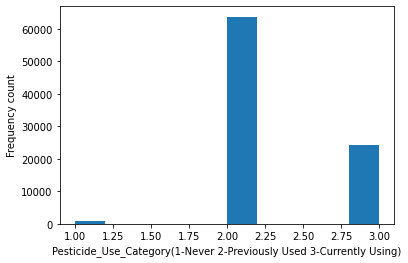

In [ ]:
plt.hist(train_data['Pesticide_Use_Category'])
plt.xlabel("Pesticide_Use_Category(1-Never 2-Previously Used 3-Currently Using)")
plt.ylabel("Frequency count")

Text(0, 0.5, 'Frequency count')

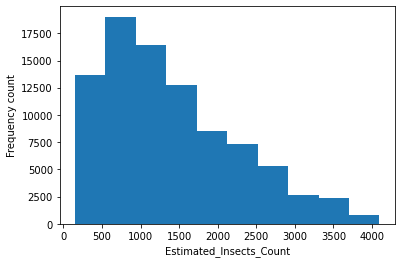

In [ ]:
plt.hist(train_data['Estimated_Insects_Count'])
plt.xlabel("Estimated_Insects_Count")
plt.ylabel("Frequency count")

Text(0, 0.5, 'Frequency count')

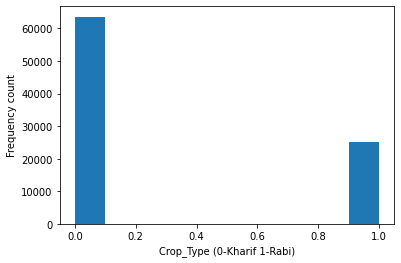

In [ ]:
plt.hist(train_data['Crop_Type'])
plt.xlabel('Crop_Type (0-Kharif 1-Rabi)')
plt.ylabel('Frequency count')

Text(0, 0.5, 'Frequency count')

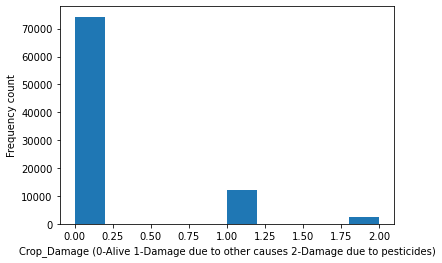

In [ ]:
plt.hist(train_data['Crop_Damage'])
plt.xlabel('Crop_Damage (0-Alive 1-Damage due to other causes 2-Damage due to pesticides)')
plt.ylabel('Frequency count')

##Seperating Testing and Training data

In [ ]:
train_data.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.00000,0,1,0
1,F00000003,209,1,0,1,0,0.00000,0,2,1
2,F00000004,257,1,0,1,0,0.00000,0,2,1
3,F00000005,257,1,1,1,0,0.00000,0,2,1
4,F00000006,342,1,0,1,0,0.00000,0,2,1
5,F00000008,448,0,1,1,0,28.62397,0,2,1
6,F00000009,448,0,1,1,0,28.62397,0,2,1
7,F00000010,577,1,0,1,0,0.00000,0,1,2
8,F00000012,731,0,0,1,0,0.00000,0,2,0
9,F00000020,1132,1,0,1,0,0.00000,0,1,2


In [ ]:
train_data.drop('ID',axis=1,inplace=True)
test_data.drop('ID',axis=1,inplace=True)

In [ ]:
X_train,Y=train_data.drop(['Crop_Damage'],axis=1).values,train_data['Crop_Damage'].values
X_test=test_data.values

In [ ]:
X_train.shape,Y.shape,X_test.shape

((88858, 8), (88858,), (59310, 8))

In [ ]:
from sklearn.model_selection import train_test_split
X_Train,X_valid,Y_train,Y_valid=train_test_split(X_train,Y,train_size=0.8,test_size=0.2,random_state=0)

In [ ]:
X_Train.shape,X_valid.shape,Y_train.shape,Y_valid.shape

((71086, 8), (17772, 8), (71086,), (17772,))

In [ ]:
df_XTrain=pd.DataFrame(X_Train,columns=["Estimated_Insects_Count","Crop_Type","Soil_Type","Pesticide_Use_Category","Number_Doses_Week","Number_Weeks_Used","Number_Weeks_Quit","Season"])
df_XTrain

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,790.0,1.0,0.0,2.0,35.0,15.00000,13.0,2.0
1,1898.0,0.0,0.0,2.0,20.0,42.00000,9.0,1.0
2,732.0,1.0,0.0,3.0,40.0,34.00000,0.0,2.0
3,1297.0,0.0,1.0,2.0,40.0,28.62397,12.0,3.0
4,489.0,1.0,0.0,3.0,60.0,23.00000,0.0,3.0
...,...,...,...,...,...,...,...,...
71081,1212.0,0.0,0.0,2.0,40.0,37.00000,6.0,1.0
71082,789.0,1.0,0.0,1.0,0.0,0.00000,0.0,1.0
71083,1385.0,0.0,1.0,2.0,20.0,28.62397,24.0,1.0
71084,1212.0,0.0,0.0,3.0,10.0,28.62397,0.0,2.0


In [ ]:
df_XValid=pd.DataFrame(X_valid,columns=["Estimated_Insects_Count","Crop_Type","Soil_Type","Pesticide_Use_Category","Number_Doses_Week","Number_Weeks_Used","Number_Weeks_Quit","Season"])
df_XValid

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,2541.0,0.0,1.0,2.0,20.0,25.00000,26.0,3.0
1,984.0,1.0,0.0,2.0,15.0,19.00000,17.0,3.0
2,3337.0,0.0,1.0,2.0,10.0,28.62397,36.0,3.0
3,1132.0,1.0,0.0,2.0,10.0,32.00000,9.0,2.0
4,1132.0,0.0,1.0,3.0,35.0,28.62397,0.0,2.0
...,...,...,...,...,...,...,...,...
17767,789.0,0.0,0.0,3.0,40.0,32.00000,0.0,1.0
17768,312.0,1.0,0.0,3.0,30.0,17.00000,0.0,1.0
17769,984.0,1.0,0.0,2.0,10.0,34.00000,1.0,1.0
17770,2541.0,1.0,0.0,2.0,15.0,28.62397,16.0,1.0


In [ ]:
df_YTrain=pd.DataFrame(Y_train,columns=["Crop_Damage"])
df_YTrain

,Crop_Damage
0,0
1,0
2,0
3,0
4,0
...,...
71081,0
71082,0
71083,0
71084,0


In [ ]:
df_YValid=pd.DataFrame(Y_valid,columns=["Crop_Damage"])
df_YValid

,Crop_Damage
0,1
1,0
2,1
3,0
4,0
...,...
17767,1
17768,2
17769,0
17770,0


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
model_lr = LogisticRegression()
model_lr.fit(X_Train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = model_lr.predict(X_valid) 
print(classification_report(Y_valid, predictions))

mae = mean_absolute_error(predictions,Y_valid) 

print("Mean Absolute Error:" , mae)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     14848
           1       0.41      0.05      0.09      2473
           2       0.12      0.00      0.00       451

    accuracy                           0.83     17772
   macro avg       0.46      0.35      0.34     17772
weighted avg       0.76      0.83      0.77     17772

Mean Absolute Error: 0.19001800585190187


In [ ]:
pred = model_lr.predict(X_test)
pred=(np.around(pred,decimals=0))
pred=pred.astype(int)
pred[:5]

array([0, 0, 0, 2, 1])

In [ ]:
new_test = pd.read_csv("test.csv")
result = pd.DataFrame(pred, new_test['ID'], columns=["Crop_Damage"])
result.to_csv("lr.csv")

In [ ]:
result = pd.concat([new_test['ID'],pd.Series(pred)],axis=1)
result.columns = ['ID','Crop_Damage']
result['Crop_Damage'].value_counts()

0    58221
1     1060
2       29
Name: Crop_Damage, dtype: int64

(array([5.8221e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0600e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.9000e+01]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

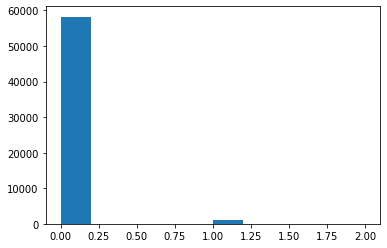

In [ ]:
plt.hist(result['Crop_Damage'])

#SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_Train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [ ]:
predictions = clf.predict(X_valid) 
print(classification_report(Y_valid, predictions))

mae = mean_absolute_error(predictions,Y_valid) 

print("Mean Absolute Error:" , mae)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     14848
           1       0.41      0.01      0.02      2473
           2       0.00      0.00      0.00       451

    accuracy                           0.83     17772
   macro avg       0.41      0.34      0.31     17772
weighted avg       0.76      0.83      0.76     17772

Mean Absolute Error: 0.1903556155750619


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred = clf.predict(X_test)
pred=(np.around(pred,decimals=0))
pred=pred.astype(int)
pred[:5]  
new_test = pd.read_csv("test.csv")
result = pd.DataFrame(pred, new_test['ID'], columns=["Crop_Damage"])
result.to_csv("clf.csv")

(array([59044.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   266.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

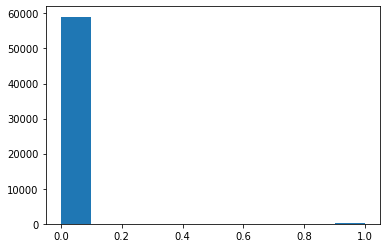

In [ ]:
plt.hist(result['Crop_Damage'])